In [39]:
import numpy as np
import matplotlib.pyplot as plt
import nibabel as nib
import glob
import os
import mne
import connectome
import pandas as pd

from nilearn import image
from nilearn import plotting
from nilearn import datasets
from nilearn.connectome import ConnectivityMeasure
from nilearn.maskers import MultiNiftiLabelsMasker
from nilearn.maskers import MultiNiftiMasker
from nilearn import image


path = 'data/'
atlas = 'Hammersmith'
correlation_measure = 'correlation' #can be also tangent, partial
res_n = 4

In [44]:
colnames=['idx','anatomical_label'] 
res = f'{res_n}x{res_n}x{res_n}'
atlas_path = path + f'/atlases/lawrance2021/label/Human/' + atlas + '_space-MNI152NLin6_res-' + res + '.nii.gz'
reference_path = path + '/atlases/lawrance2021/reference_brains/MNI152NLin6_res-1x1x1_T1w_descr-brain.nii.gz'
reference_path2 = path + '/atlases/lawrance2021/reference_brains/MNI152NLin6_res-1x1x1_T1w.nii.gz'



anatomic_path = path + f'/atlases/lawrance2021/label/Human/Anatomical-labels-csv/' + atlas + '.csv'
ana_labels = pd.read_csv(anatomic_path,names=colnames, header=None)
imgs_paths = glob.glob(path + 'func_images/AOMIC/prep_nifti/*000*.nii')
ana_labels.anatomical_label[0]

'R_Hippocampus'

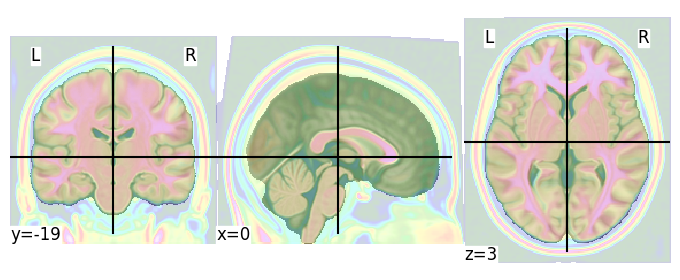

In [45]:
plotting.plot_roi(reference_path2,alpha=0.2)

In [ ]:
#print(imgs_paths)
#schaefer = datasets.fetch_atlas_schaefer_2018(n_rois = 400,resolution_mm = 2)
connectome_measure = ConnectivityMeasure(kind = 'correlation')
masker = MultiNiftiLabelsMasker(labels_img = atlas_path, standardize= True, memory='nilearn_cache', n_jobs = -1)
time_series = masker.fit_transform(imgs_paths)

In [3]:
time_series2 = connectome.calculate_correalations('Hammersmith',4)

In [6]:
sum(time_series[0] -time_series2[0])

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

In [79]:
correlation_matrices = connectome_measure.fit_transform(time_series)

In [17]:
#mean_ = connectome_measure.mean_
coords = plotting.find_parcellation_cut_coords(labels_img = atlas_path)

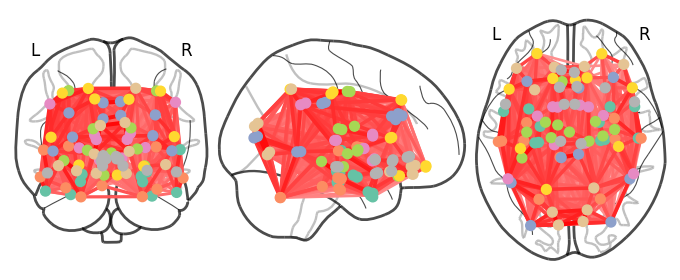

In [81]:
plotting.plot_connectome(mean_, coords, edge_threshold = '60%')

In [45]:
ana_labels[ana_labels.anatomical_label == 'R_Straight_gyrus']

idx  anatomical_label
52   53  R_Straight_gyrus

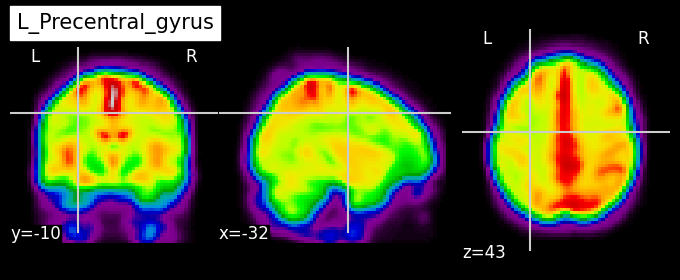

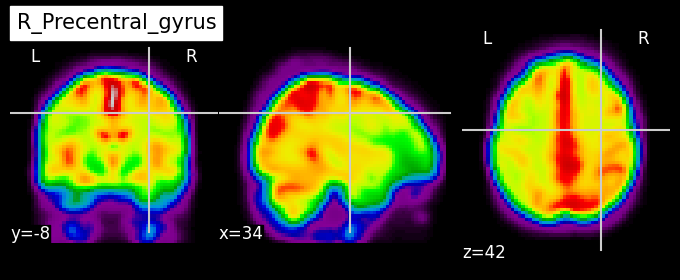

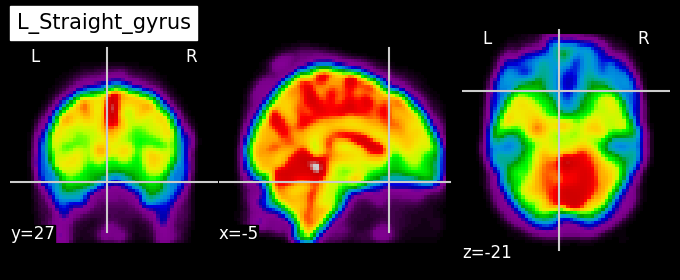

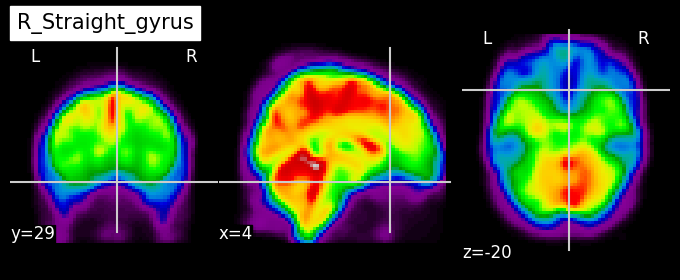

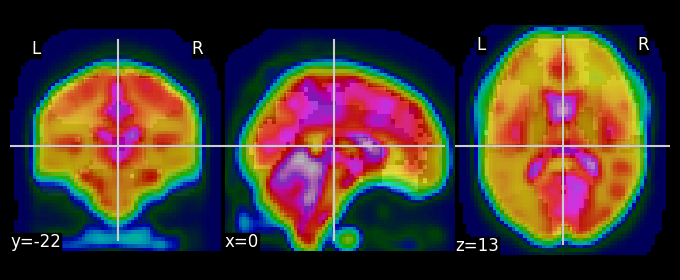

In [20]:
#plotting.plot_matrix(mean_[:50,:50],labels = schaefer['labels'][:50])
#plotting.show()
#plotting.plot_matrix(mean_)
#plotting.show()
rangeC = np.arange(49,53)
for n in rangeC:
    plotting.plot_epi(image.mean_img(imgs_paths[5]),cut_coords=coords[n],title = f'{ana_labels.anatomical_label[n]}')
    plotting.show()
plotting.plot_roi(image.mean_img(imgs_paths[6]),atlas_path)



/kyb/agks/sheczko/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



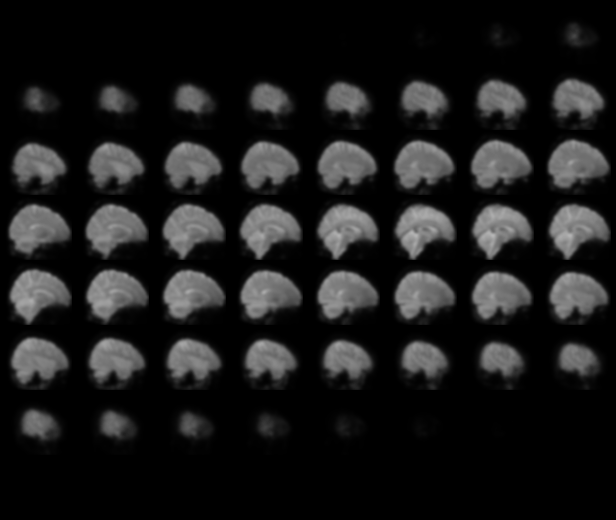
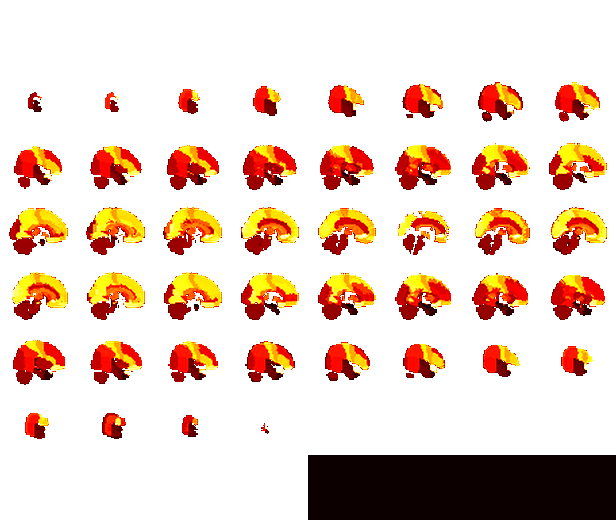

In [22]:
plotting.view_img(atlas_path,bg_img = image.mean_img(imgs_paths[5]),title='using the prep_nifi')


/kyb/agks/sheczko/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



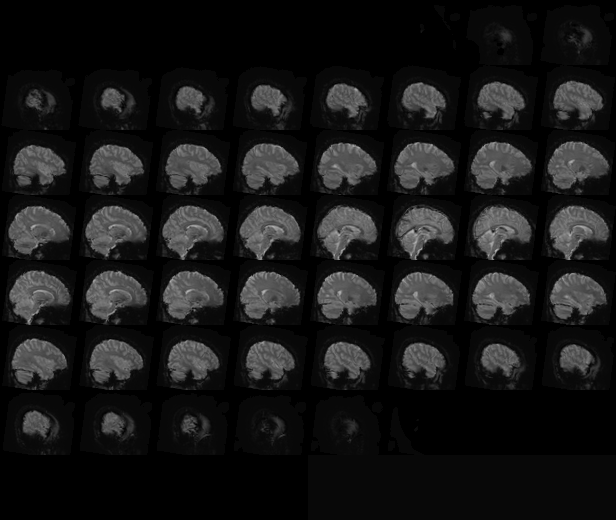
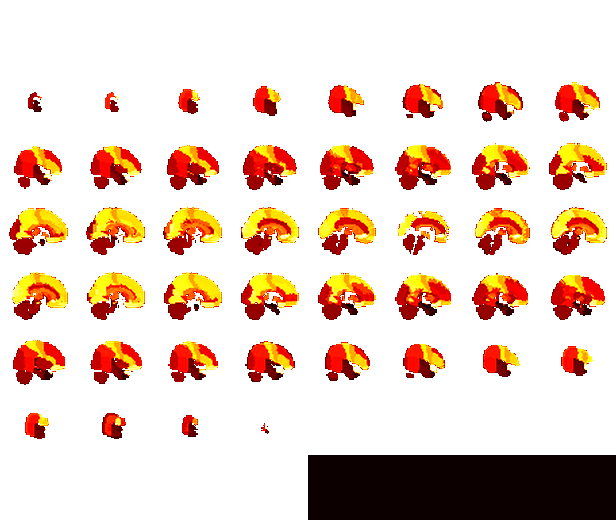

In [23]:
path_prep_AOMIC = path + 'func_images/AOMIC/sub-0001_task-moviewatching_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz'
plotting.view_img(atlas_path,bg_img = image.mean_img(path_prep_AOMIC),title='using the AOMIC provided preproc file')



/kyb/agks/sheczko/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



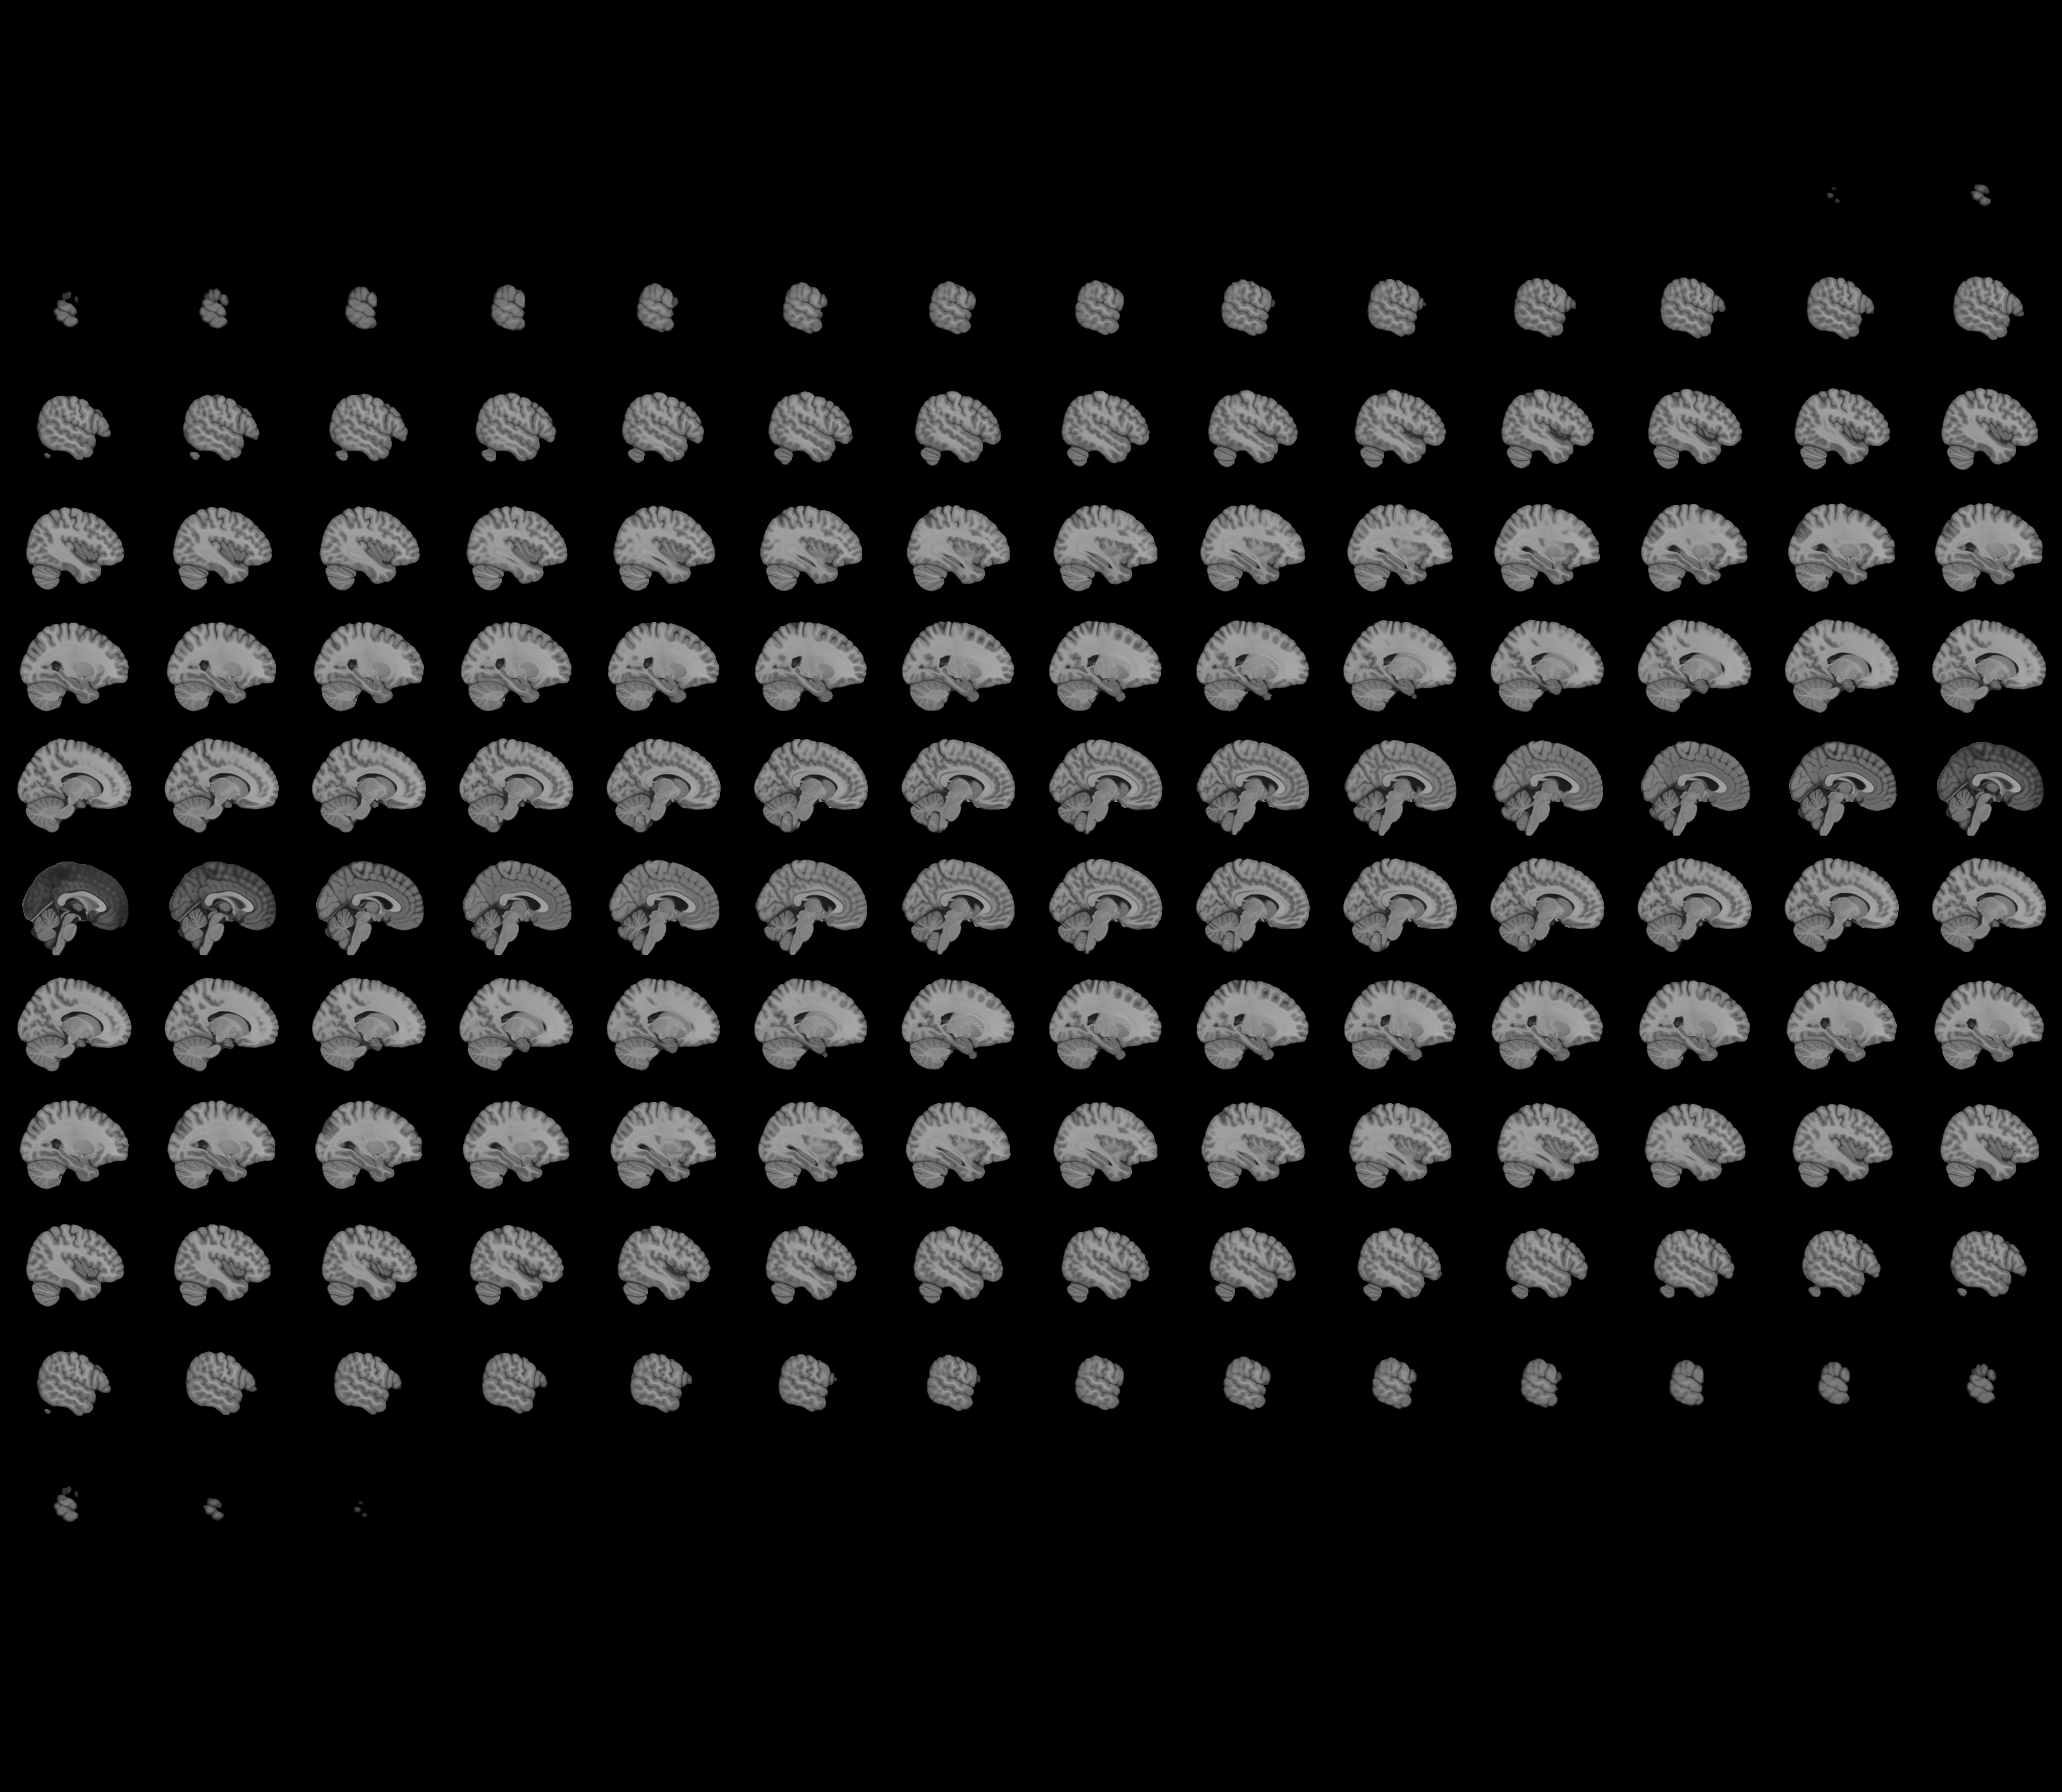
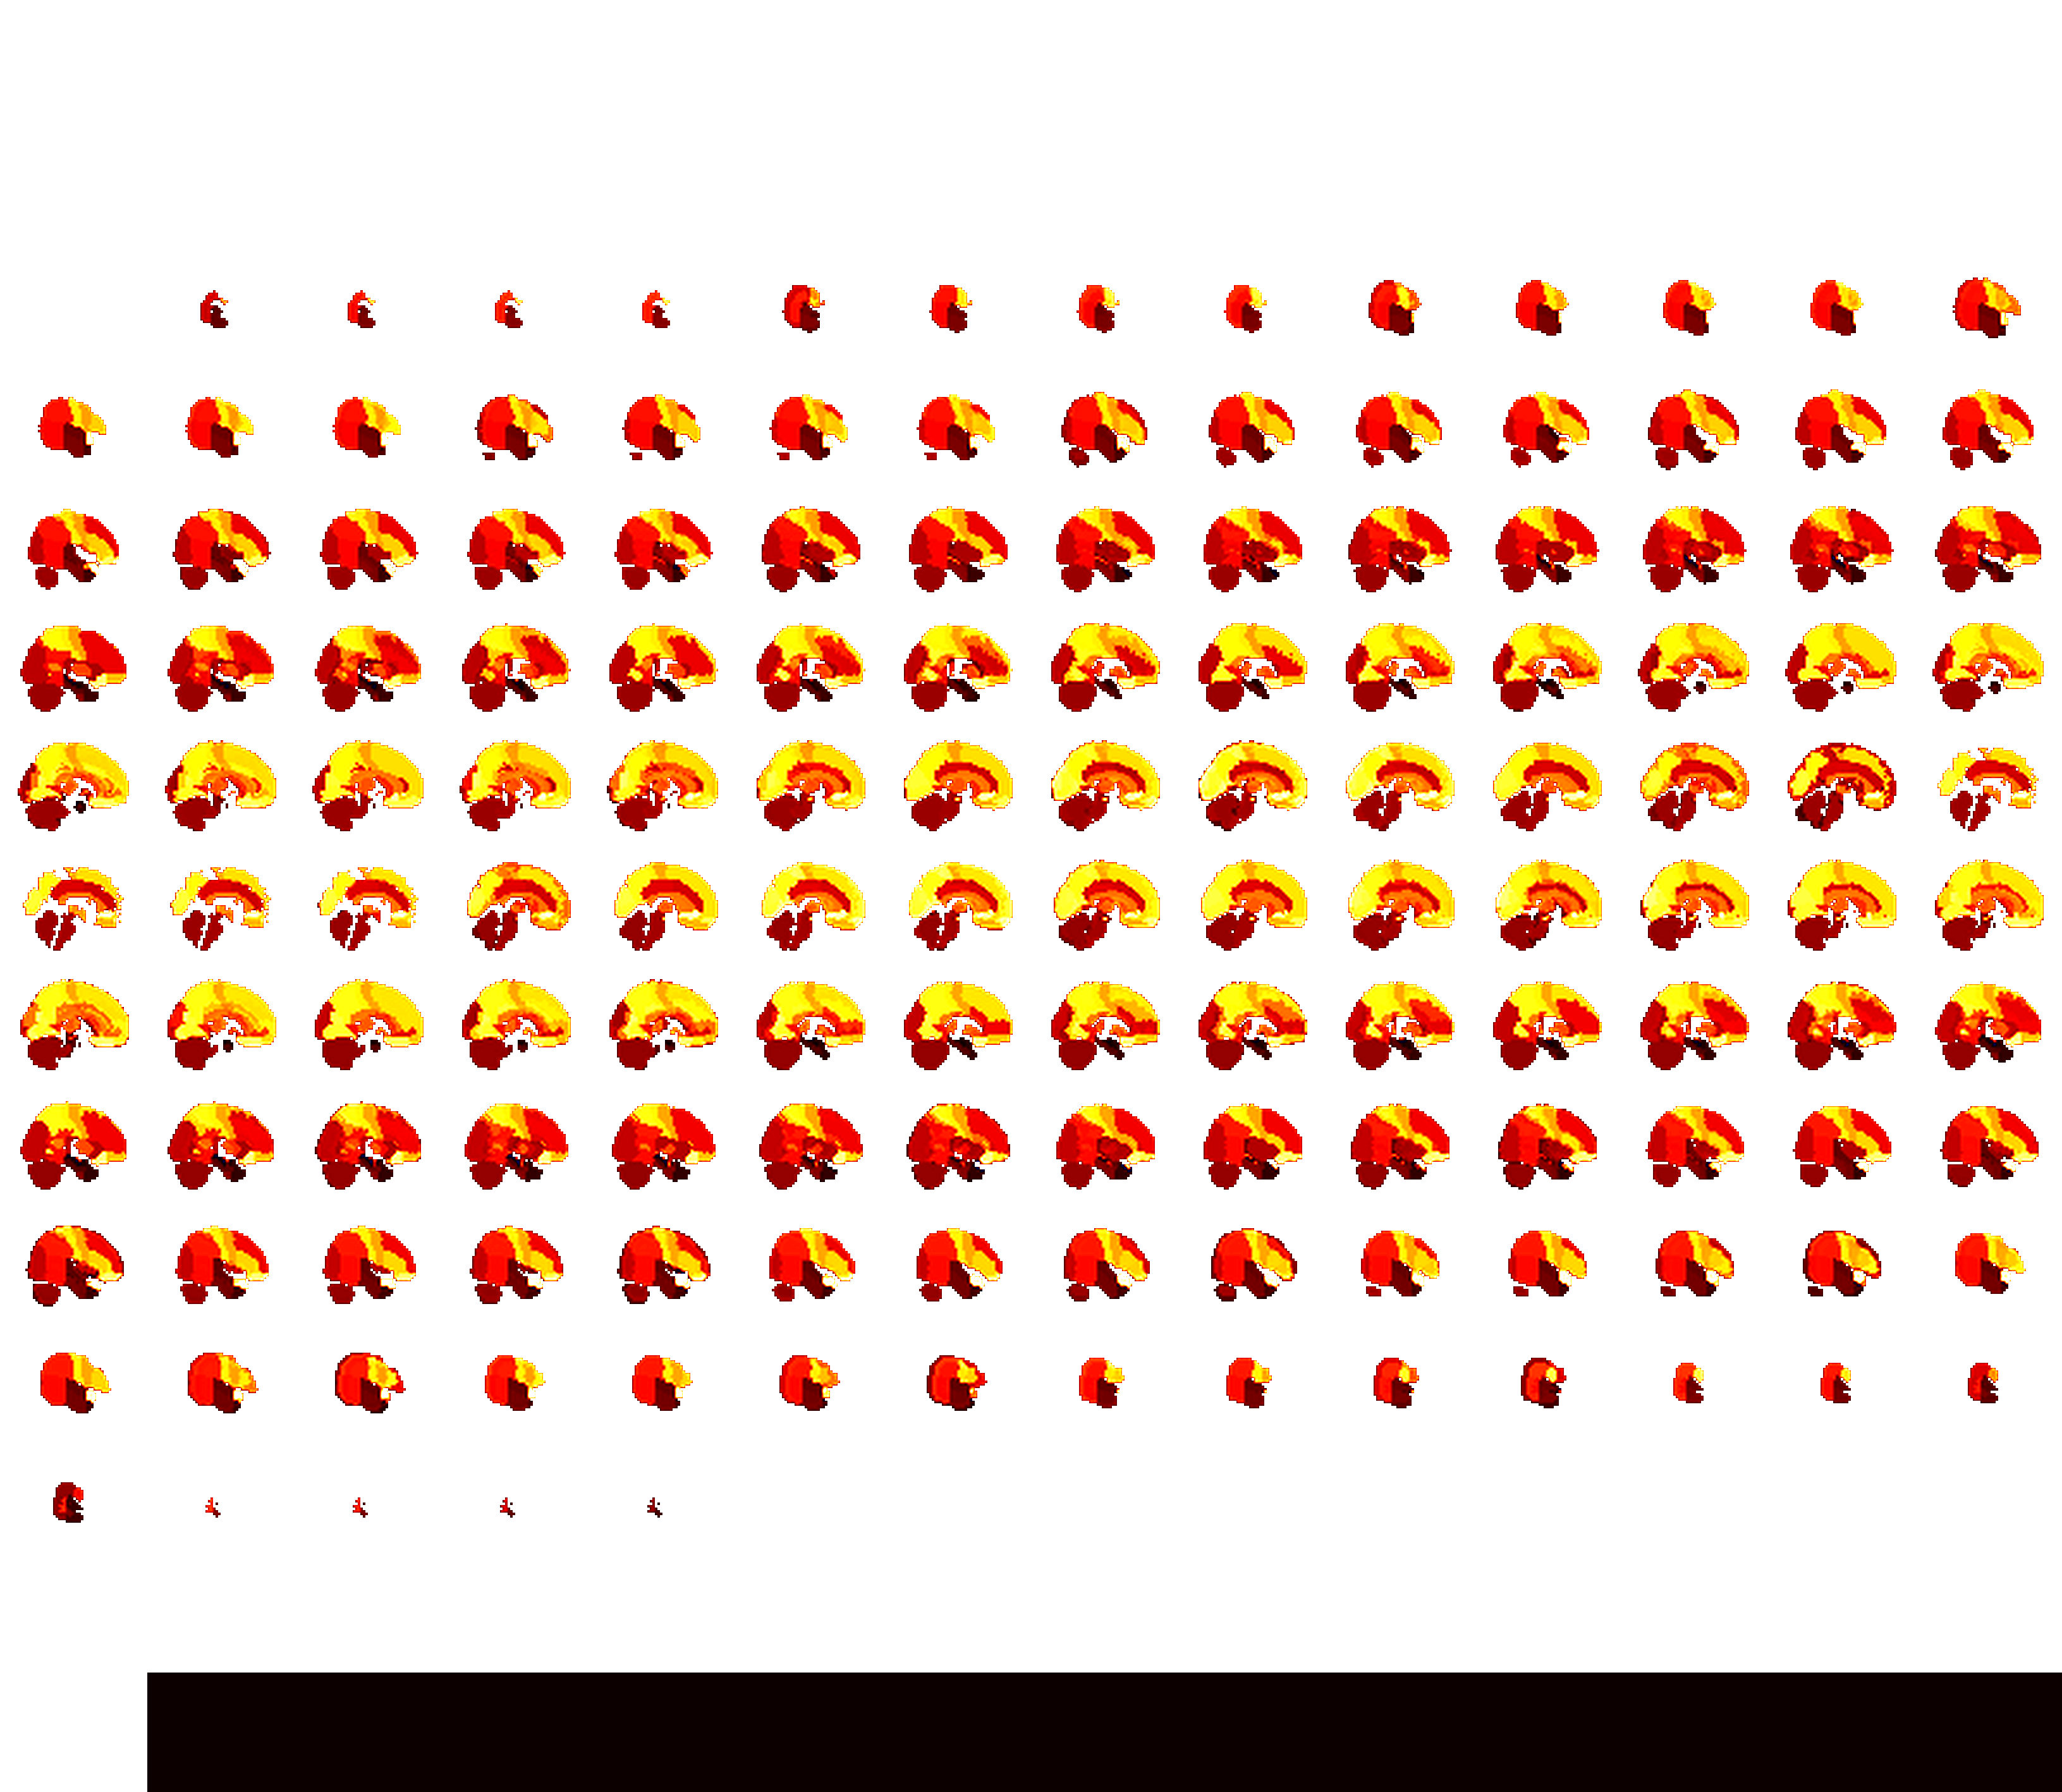

In [25]:
plotting.view_img(atlas_path)

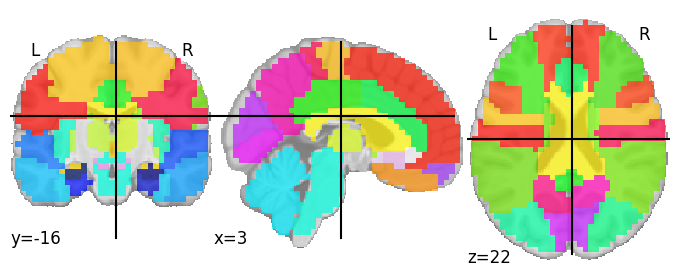

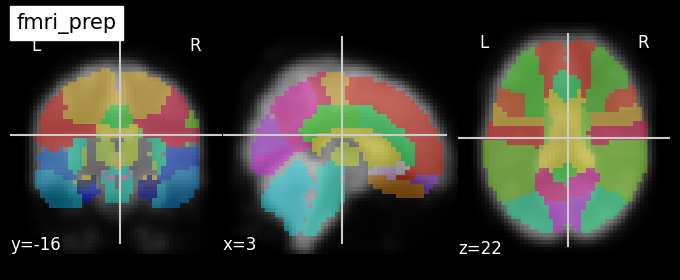

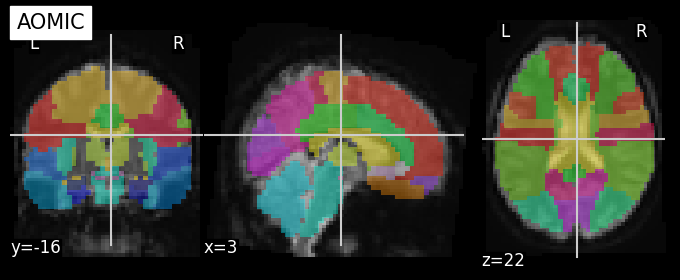

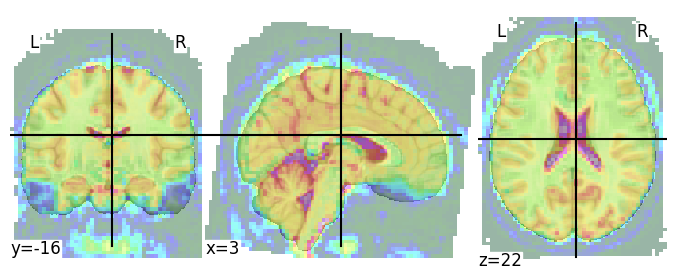

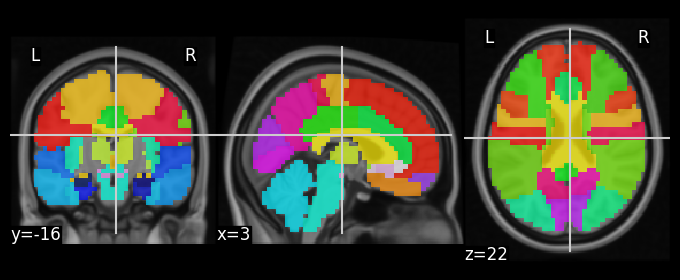

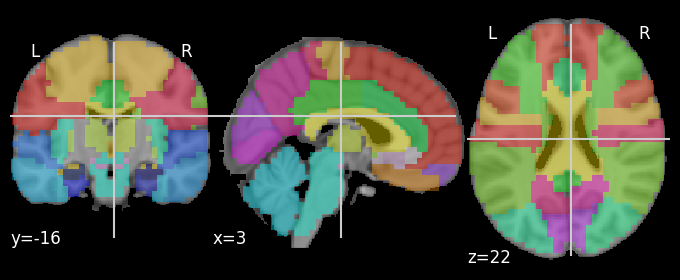

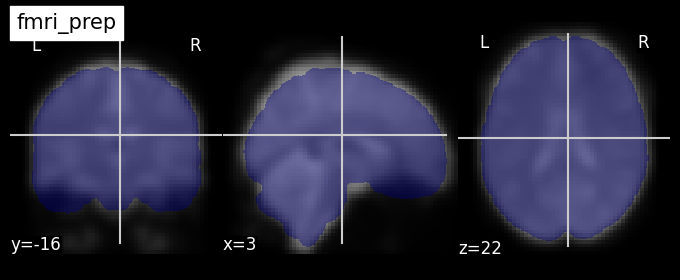

In [94]:
coord_cut = np.array([3,-16,22])
plotting.plot_roi(atlas_path,cut_coords=coord_cut)
plotting.show()
plotting.plot_roi(atlas_path,image.mean_img(imgs_paths[5]),title='fmri_prep',cut_coords=coord_cut,alpha=0.4)
plotting.show()
plotting.plot_roi(atlas_path,image.mean_img(path_prep_AOMIC),title="AOMIC",cut_coords=coord_cut,alpha=0.4)
plotting.show()
plotting.plot_roi(image.mean_img(path_prep_AOMIC),cut_coords=coord_cut,alpha = 0.4)
plotting.show()
plotting.plot_roi(atlas_path,reference_path2,cut_coords=coord_cut)
plotting.show()
plotting.plot_roi(atlas_path,reference_path,cut_coords=coord_cut,alpha = 0.4)
mask_c = '/kyb/agks/sheczko/Downloads/MastersThesis/code/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c_mask.nii'
plotting.plot_roi(mask_c,image.mean_img(imgs_paths[5]),title='fmri_prep',cut_coords=coord_cut,alpha=0.4)




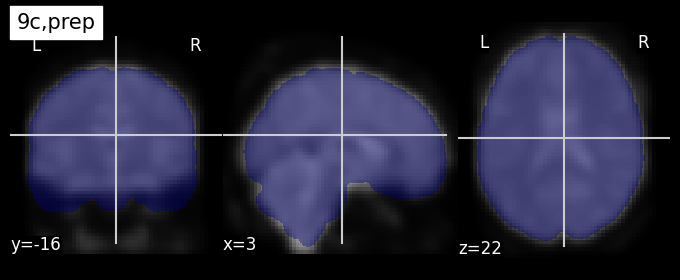

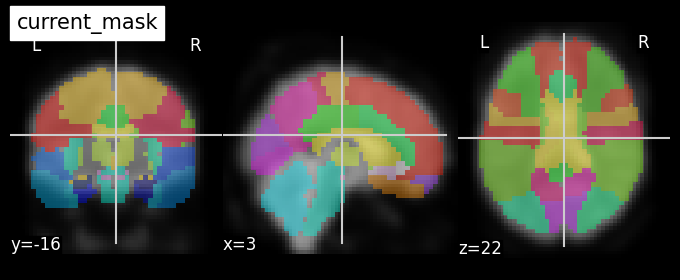

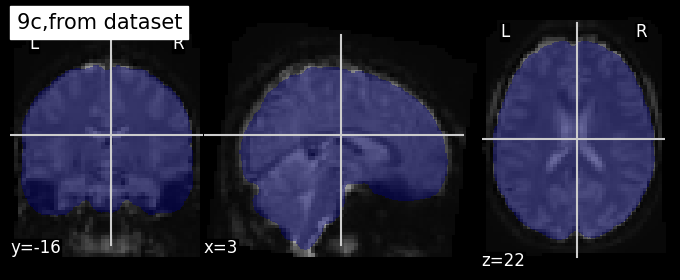

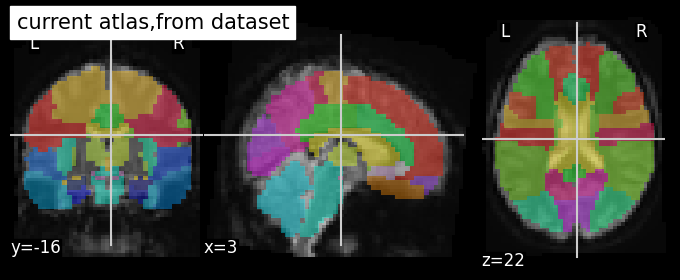

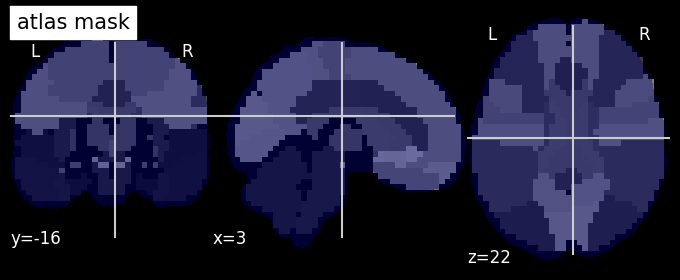

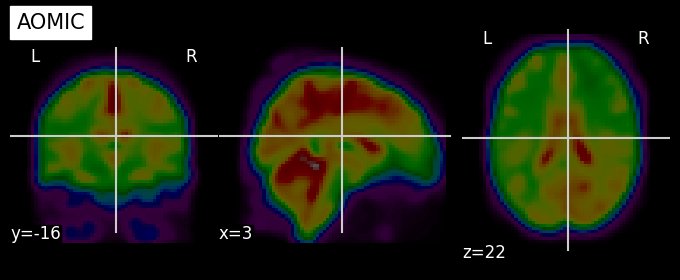

In [95]:
mask_c = '/kyb/agks/sheczko/Downloads/MastersThesis/code/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t1_tal_nlin_asym_09c_mask.nii'
plotting.plot_roi(mask_c,image.mean_img(imgs_paths[7]),title='9c,prep',cut_coords=coord_cut,alpha=0.4)
plotting.plot_roi(atlas_path,image.mean_img(imgs_paths[7]),title='current_mask',cut_coords=coord_cut,alpha=0.4,threshold=0.1)
plotting.plot_roi(mask_c,image.mean_img(path_prep_AOMIC),title='9c,from dataset',cut_coords=coord_cut,alpha=0.4)
plotting.plot_roi(atlas_path,image.mean_img(path_prep_AOMIC),title='current atlas,from dataset',cut_coords=coord_cut,alpha=0.4)

plotting.show()
plotting.plot_roi(mask_c,atlas_path,title="atlas mask",cut_coords=coord_cut,alpha=0.4)
plotting.plot_epi(image.mean_img(imgs_paths[5]),title="AOMIC",cut_coords=coord_cut,alpha=0.4)



/kyb/agks/sheczko/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/kyb/agks/sheczko/.local/lib/python3.10/site-packages/nilearn/image/resampling.py:274: UserWarning: Resampling binary images with continuous or linear interpolation. This might lead to unexpected results. You might consider using nearest interpolation instead.
  warnings.warn("Resampling binary images with continuous or "
/kyb/agks/sheczko/.local/lib/python3.10/site-packages/nilearn/plotting/html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



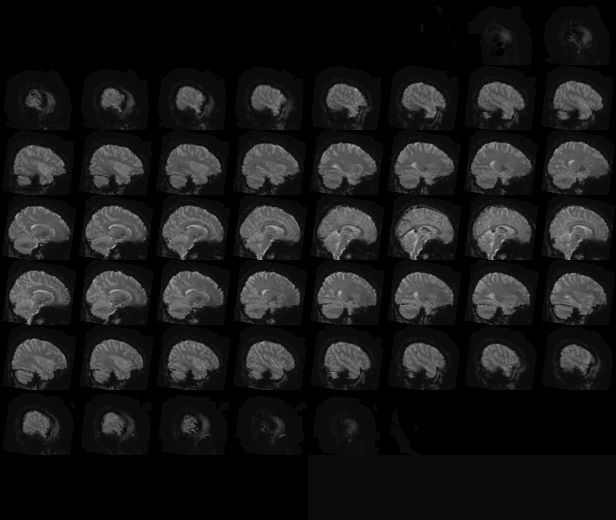
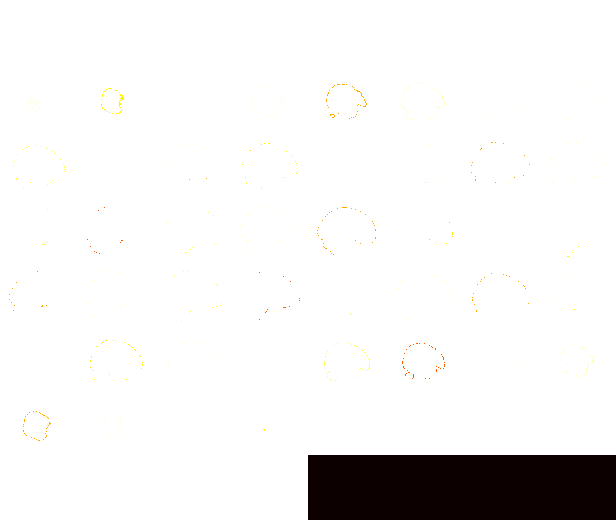

In [101]:
plotting.view_img(mask_c,image.index_img(path_prep_AOMIC,40),title="atlas mask",cut_coords=coord_cut,opacity=0.4)


/kyb/agks/sheczko/.local/lib/python3.10/site-packages/numpy/core/fromnumeric.py:784: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)
/kyb/agks/sheczko/.local/lib/python3.10/site-packages/nilearn/plotting/html_document.py:59: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  warnings.warn('It seems you have created more than {} '



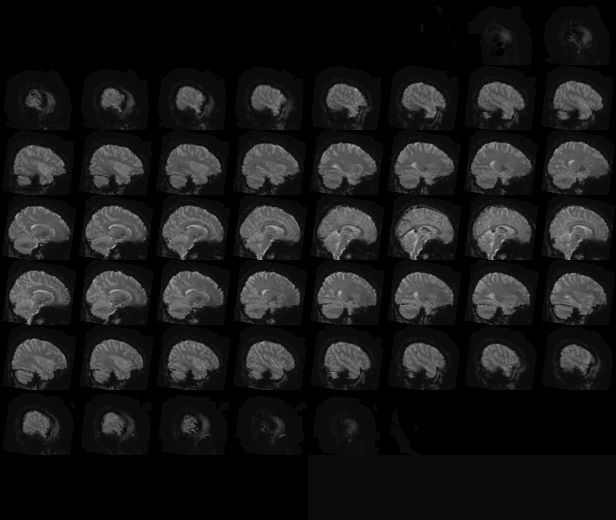
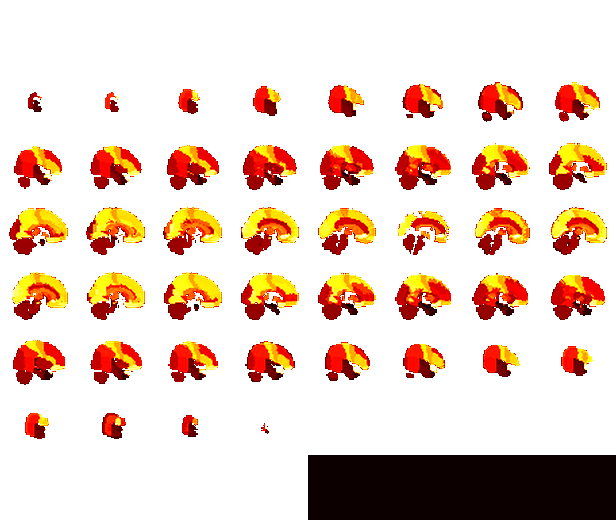

In [102]:
plotting.view_img(atlas_path,image.index_img(path_prep_AOMIC,40),title="atlas mask",cut_coords=coord_cut,opacity=0.4)


In [93]:
plotting.view_img(mask_c, bg_img = image.index_img(imgs_paths[7],40),title="atlas mask",cut_coords=coord_cut,opacity= 0.1)


ValueError: File not found: '/kyb/agks/sheczko/Downloads/MastersThesis/code/mni_icbm152_nlin_asym_09c_nifti/mni_icbm152_nlin_asym_09c/mni_icbm152_t2_tal_nlin_asym_09c_mask.nii'

In [110]:
class MyClass:
    """A simple example class"""
    i = 12345
    def __init__(self):
        self.m = 'hello world'

    def f(self):
        return 'hello world'
x 

In [91]:
x.counter = 1
while x.counter < 10:
    x.counter = x.counter * 2
print(x.counter)

16


In [118]:
atlas_ref = 

<bound method MyClass.f of <__main__.MyClass object at 0x7f1815380f10>>

In [101]:
hi.f()

TypeError: MyClass.f() missing 1 required positional argument: 'self'